In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir = './/dataset'

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [4]:
data_dir

WindowsPath('dataset')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('dataset/Cats/cat.0.jpg'),
 WindowsPath('dataset/Cats/cat.1.jpg'),
 WindowsPath('dataset/Cats/cat.10.jpg'),
 WindowsPath('dataset/Cats/cat.100.jpg'),
 WindowsPath('dataset/Cats/cat.101.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

1002

In [7]:
dogs = list(data_dir.glob('Dogs/*'))
dogs[:5]

[WindowsPath('dataset/Dogs/dog.0.jpg'),
 WindowsPath('dataset/Dogs/dog.1.jpg'),
 WindowsPath('dataset/Dogs/dog.10.jpg'),
 WindowsPath('dataset/Dogs/dog.100.jpg'),
 WindowsPath('dataset/Dogs/dog.101.jpg')]

In [8]:
cats = list(data_dir.glob('Cats/*'))
cats[:5]

[WindowsPath('dataset/Cats/cat.0.jpg'),
 WindowsPath('dataset/Cats/cat.1.jpg'),
 WindowsPath('dataset/Cats/cat.10.jpg'),
 WindowsPath('dataset/Cats/cat.100.jpg'),
 WindowsPath('dataset/Cats/cat.101.jpg')]

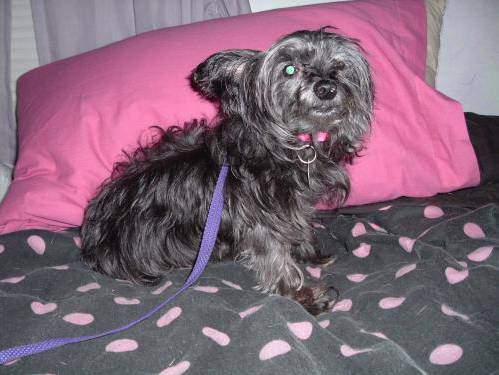

In [9]:
PIL.Image.open(str(dogs[0]))

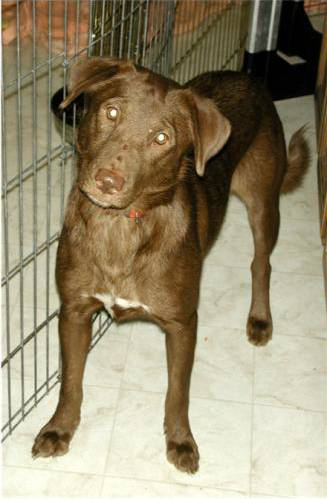

In [10]:
PIL.Image.open(str(dogs[1]))

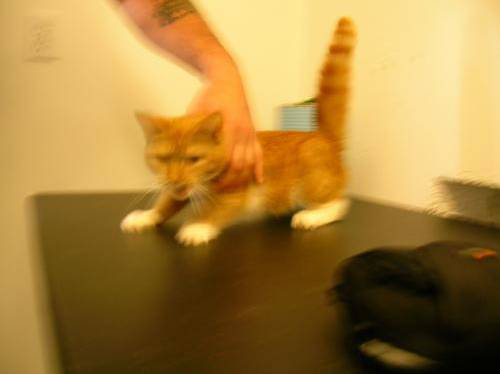

In [11]:
PIL.Image.open(str(cats[0]))

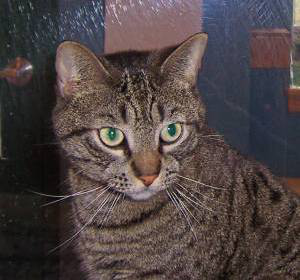

In [12]:
PIL.Image.open(str(cats[1]))

In [13]:
images_dict = {
    'dogs' : list(data_dir.glob('Dogs/*')),
    'cats' : list(data_dir.glob('Cats/*'))
}

In [14]:
labels_dict = {
    'dogs': 0,
    'cats': 1
}

In [15]:
images_dict['dogs'][:5]

[WindowsPath('dataset/Dogs/dog.0.jpg'),
 WindowsPath('dataset/Dogs/dog.1.jpg'),
 WindowsPath('dataset/Dogs/dog.10.jpg'),
 WindowsPath('dataset/Dogs/dog.100.jpg'),
 WindowsPath('dataset/Dogs/dog.101.jpg')]

In [16]:
img = cv2.imread(str(images_dict['dogs'][0]))

In [17]:
img.shape

(375, 499, 3)

In [18]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [19]:
X, y = [], []

for name, images in images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(labels_dict[name])

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
len(X_train)

751

In [24]:
len(X_test)

251

In [25]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [26]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
24/24 [==============================] - 16s 652ms/step - loss: 0.9001 - accuracy: 0.4900
Epoch 2/10
24/24 [==============================] - 15s 639ms/step - loss: 0.6909 - accuracy: 0.5419
Epoch 3/10
24/24 [==============================] - 16s 673ms/step - loss: 0.6765 - accuracy: 0.5965
Epoch 4/10
24/24 [==============================] - 15s 641ms/step - loss: 0.6439 - accuracy: 0.6205
Epoch 5/10
24/24 [==============================] - 15s 639ms/step - loss: 0.5695 - accuracy: 0.7270
Epoch 6/10
24/24 [==============================] - 15s 644ms/step - loss: 0.4717 - accuracy: 0.7803
Epoch 7/10
24/24 [==============================] - 16s 645ms/step - loss: 0.3834 - accuracy: 0.8336
Epoch 8/10
24/24 [==============================] - 15s 642ms/step - loss: 0.2688 - accuracy: 0.8988
Epoch 9/10
24/24 [==============================] - 16s 647ms/step - loss: 0.2029 - accuracy: 0.9241
Epoch 10/10
24/24 [==============================] - 16s 646ms/step - loss: 0.1381 - accura

In [27]:
model.evaluate(X_test_scaled, y_test)

8/8 [==============================] - 2s 174ms/step - loss: 0.9860 - accuracy: 0.6016


[0.9860111474990845, 0.6015936136245728]

In [28]:
predictions = model.predict(X_test_scaled)

In [30]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(224, 
                                                              224,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [34]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
24/24 [==============================] - 20s 786ms/step - loss: 0.7549 - accuracy: 0.5446
Epoch 2/30
24/24 [==============================] - 19s 778ms/step - loss: 0.6865 - accuracy: 0.5446
Epoch 3/30
24/24 [==============================] - 19s 776ms/step - loss: 0.6548 - accuracy: 0.6431
Epoch 4/30
24/24 [==============================] - 19s 776ms/step - loss: 0.6357 - accuracy: 0.6431
Epoch 5/30
24/24 [==============================] - 19s 776ms/step - loss: 0.6548 - accuracy: 0.6165
Epoch 6/30
24/24 [==============================] - 19s 778ms/step - loss: 0.6167 - accuracy: 0.6525
Epoch 7/30
24/24 [==============================] - 19s 775ms/step - loss: 0.5966 - accuracy: 0.6897
Epoch 8/30
24/24 [==============================] - 19s 777ms/step - loss: 0.6162 - accuracy: 0.6804
Epoch 9/30
24/24 [==============================] - 19s 771ms/step - loss: 0.5803 - accuracy: 0.6964
Epoch 10/30
24/24 [==============================] - 19s 777ms/step - loss: 0.5744 - accura

In [35]:
model.evaluate(X_test_scaled, y_test)

8/8 [==============================] - 2s 174ms/step - loss: 0.5839 - accuracy: 0.7410


[0.5838990807533264, 0.7410358786582947]